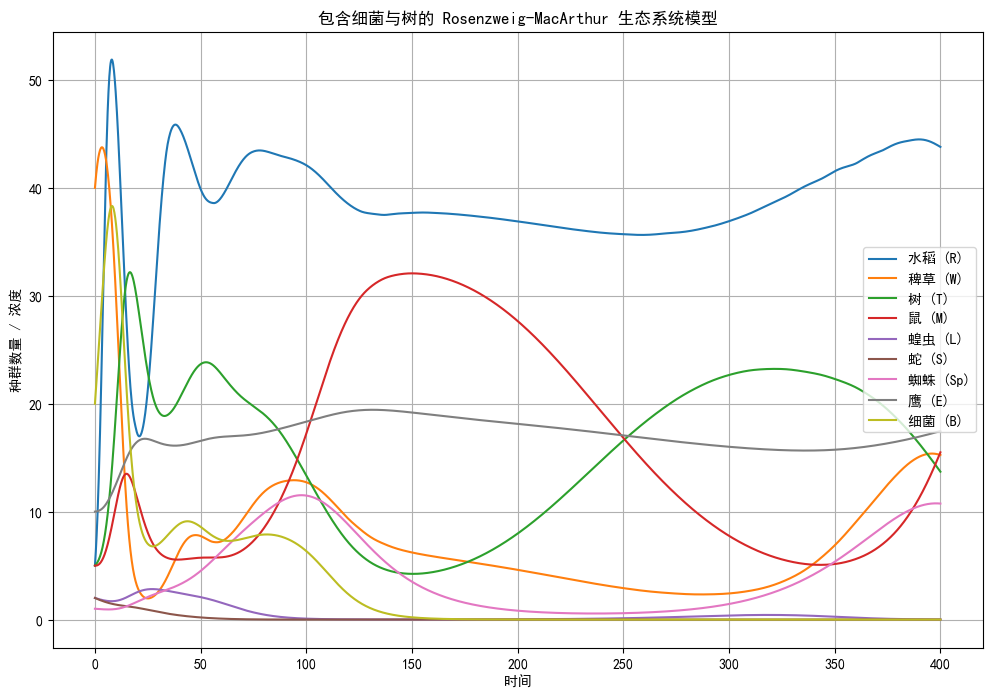

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'SimHei'
def rosenzweig_macarthur_with_bacteria_and_tree(t, y, params):
    """ 生态系统动力学模型，包含 9 个物种 """

    R, W, M, L, S, Sp, E, B, T_ = y

    (
        rR, KR, rW, KW,
        aRM, bRM, eMR, aWM, bWM, eMW,
        aRL, bRL, eLR, aWL, bWL, eLW,
        aSM, bSM, eSM, aSL, bSL, eSL,
        aSpL, bSpL, eSpL,
        aES, bES, eES, aESp, bESp, eESp, aEM, bEM, eEM,
        aBR, bBR, eRB, aBW, bBW, eWB,
        alphaB, dR, dW, dM, dL, dS, dSp, dE, dB,
        rT, KT, aTM, bTM, eTM, aTL, bTL, eTL, dT
    ) = params

    cons_R_by_M = (aRM * R * M) / (1.0 + bRM * R)
    cons_R_by_L = (aRL * R * L) / (1.0 + bRL * R)
    cons_B_by_R = (aBR * B * R) / (1.0 + bBR * B)
    gain_R_from_B = eRB * cons_B_by_R

    dRdt = rR * R * (1 - R / KR) + gain_R_from_B - cons_R_by_M - cons_R_by_L - dR * R

    cons_W_by_M = (aWM * W * M) / (1.0 + bWM * W)
    cons_W_by_L = (aWL * W * L) / (1.0 + bWL * W)
    cons_B_by_W = (aBW * B * W) / (1.0 + bBW * B)
    gain_W_from_B = eWB * cons_B_by_W

    dWdt = rW * W * (1 - W / KW) + gain_W_from_B - cons_W_by_M - cons_W_by_L - dW * W

    cons_T_by_M = (aTM * T_ * M) / (1.0 + bTM * T_)
    cons_T_by_L = (aTL * T_ * L) / (1.0 + bTL * T_)
    gain_M_from_T = eTM * cons_T_by_M
    gain_L_from_T = eTL * cons_T_by_L

    dTdt = rT * T_ * (1 - T_ / KT) - cons_T_by_M - cons_T_by_L - dT * T_

    gain_M_from_R = eMR * cons_R_by_M
    gain_M_from_W = eMW * cons_W_by_M
    cons_M_by_S = (aSM * M * S) / (1.0 + bSM * M)
    cons_M_by_E = (aEM * M * E) / (1.0 + bEM * M)

    dMdt = gain_M_from_R + gain_M_from_W + gain_M_from_T - cons_M_by_S - cons_M_by_E - dM * M

    gain_L_from_R = eLR * cons_R_by_L
    gain_L_from_W = eLW * cons_W_by_L
    cons_L_by_S = (aSL * L * S) / (1.0 + bSL * L)
    cons_L_by_Sp = (aSpL * L * Sp) / (1.0 + bSpL * L)

    dLdt = gain_L_from_R + gain_L_from_W + gain_L_from_T - cons_L_by_S - cons_L_by_Sp - dL * L

    gain_S_from_M = eSM * cons_M_by_S
    gain_S_from_L = eSL * cons_L_by_S
    cons_S_by_E = (aES * S * E) / (1.0 + bES * S)

    dSdt = gain_S_from_M + gain_S_from_L - cons_S_by_E - dS * S

    gain_Sp_from_L = eSpL * cons_L_by_Sp
    cons_Sp_by_E = (aESp * Sp * E) / (1.0 + bESp * Sp)

    dSpdt = gain_Sp_from_L - cons_Sp_by_E - dSp * Sp

    gain_E_from_S = eES * cons_S_by_E
    gain_E_from_Sp = eESp * cons_Sp_by_E
    gain_E_from_M = eEM * cons_M_by_E

    dEdt = gain_E_from_S + gain_E_from_Sp + gain_E_from_M - dE * E

    total_death_flux = (dR * R + dW * W + dM * M + dL * L + dS * S + dSp * Sp + dE * E + dT * T_)
    bacteria_growth = alphaB * total_death_flux

    dBdt = bacteria_growth - dB * B

    return [dRdt, dWdt, dMdt, dLdt, dSdt, dSpdt, dEdt, dBdt, dTdt]

params_example_with_tree = (
    0.8, 80.0, 0.6, 60.0, 0.02, 0.01, 0.2, 0.02, 0.01, 0.2,
    0.015, 0.01, 0.2, 0.015, 0.01, 0.2, 0.01, 0.01, 0.3, 0.01, 0.01, 0.3,
    0.01, 0.01, 0.35, 0.01, 0.01, 0.4, 0.01, 0.01, 0.4, 0.01, 0.01, 0.4,
    0.005, 0.01, 0.1, 0.005, 0.01, 0.1, 0.2, 0.02, 0.02, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05,
    0.3, 100.0, 0.01, 0.01, 0.2, 0.01, 0.01, 0.2, 0.02
)

t_span = (0, 400)
t_eval = np.linspace(0, 400, 2001)
y0_with_tree = [5, 40, 5, 5, 2, 2, 1, 10, 20]
solution_tree_ivp = solve_ivp(
    rosenzweig_macarthur_with_bacteria_and_tree, t_span, y0_with_tree,
    args=(params_example_with_tree,), t_eval=t_eval, method='RK45'
)

plt.figure(figsize=(12, 8))
for i, label in enumerate(['水稻 (R)', '稗草 (W)', '树 (T)', '鼠 (M)', '蝗虫 (L)', '蛇 (S)', '蜘蛛 (Sp)', '鹰 (E)', '细菌 (B)']):
    plt.plot(t_eval, solution_tree_ivp.y[i], label=label)
plt.xlabel('时间')
plt.ylabel('种群数量 / 浓度')
plt.title('包含细菌与树的 Rosenzweig-MacArthur 生态系统模型')
plt.legend()
plt.grid(True)
plt.show()


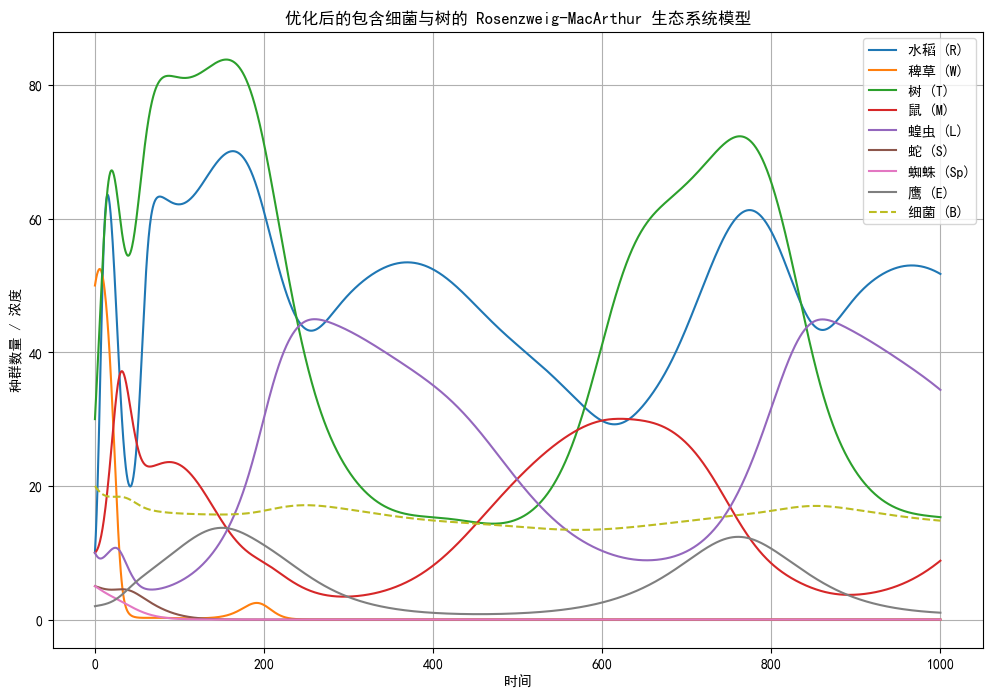

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def rosenzweig_macarthur_with_bacteria_and_tree(y, t, params):
    """
    建立一个包含 9 个物种的 Rosenzweig-MacArthur 型模型:
      1) R(t):  水稻 (生产者)
      2) W(t):  稗草 (生产者)
      3) M(t):  鼠 (初级捕食者)         - 吃水稻 R、稗草 W、树 T
      4) L(t):  蝗虫 (初级捕食者)       - 吃水稻 R、稗草 W、树 T
      5) S(t):  蛇 (次级捕食者)         - 吃鼠 M、蝗虫 L
      6) Sp(t): 蜘蛛 (次级捕食者)       - 吃蝗虫 L
      7) E(t):  鹰 (顶级捕食者)         - 吃蛇 S、蜘蛛 Sp、鼠 M
      8) B(t):  细菌 (分解者)           - 利用各物种的死亡率×数量
      9) T(t):  树 (生产者)             - 也被鼠 M 和蝗虫 L 消费

    - 生产者 (R、W、T) 具有 logistic 增长。
    - 鼠 M、蝗虫 L 为初级捕食者，捕食 R、W、T。
    - 蛇 S、蜘蛛 Sp 为次级捕食者。
    - 鹰 E 为顶级捕食者。
    - 细菌 B 则利用所有物种的死亡作为额外资源。
    """

    # 解包状态变量
    R, W, M, L, S, Sp, E, B, T_ = y

    # 解包参数
    (
        # 水稻 R 的增殖参数
        rR, KR,
        # 稗草 W 的增殖参数
        rW, KW,

        # 鼠 M 对 R、W 的捕食系数
        aRM, bRM, eMR,
        aWM, bWM, eMW,

        # 蝗虫 L 对 R、W 的捕食系数
        aRL, bRL, eLR,
        aWL, bWL, eLW,

        # 蛇 S 对鼠 M、蝗虫 L 的捕食系数
        aSM, bSM, eSM,
        aSL, bSL, eSL,

        # 蜘蛛 Sp 对蝗虫 L 的捕食系数
        aSpL, bSpL, eSpL,

        # 鹰 E 对 (S, Sp, M) 的捕食系数
        aES, bES, eES,
        aESp, bESp, eESp,
        aEM, bEM, eEM,

        # R、W 消耗细菌 B 的参数
        aBR, bBR, eRB,
        aBW, bBW, eWB,

        # 细菌 B 的分解系数
        alphaB,

        # 各物种死亡率
        dR, dW, dM, dL, dS, dSp, dE, dB,

        # 树 T 的 logistic 生长 + 相关捕食参数
        rT, KT,
        aTM, bTM, eTM,
        aTL, bTL, eTL,
        dT
    ) = params

    # ------------------------------------------------------
    # 1. 生产者 R(t): 水稻
    #    logistic 增长 + 消耗细菌 B 促进生长 - 被 M 和 L 捕食 - 自然死亡
    # ------------------------------------------------------
    cons_R_by_M = (aRM * R * M) / (1.0 + bRM * R)
    cons_R_by_L = (aRL * R * L) / (1.0 + bRL * R)
    cons_B_by_R = (aBR * B * R) / (1.0 + bBR * B)
    gain_R_from_B = eRB * cons_B_by_R

    dRdt = rR * R * (1 - R / KR) \
           + gain_R_from_B \
           - cons_R_by_M \
           - cons_R_by_L \
           - dR * R

    # ------------------------------------------------------
    # 2. 生产者 W(t): 稗草
    #    logistic 增长 + 消耗细菌 B 促进生长 - 被 M 和 L 捕食 - 自然死亡
    # ------------------------------------------------------
    cons_W_by_M = (aWM * W * M) / (1.0 + bWM * W)
    cons_W_by_L = (aWL * W * L) / (1.0 + bWL * W)
    cons_B_by_W = (aBW * B * W) / (1.0 + bBW * B)
    gain_W_from_B = eWB * cons_B_by_W

    dWdt = rW * W * (1 - W / KW) \
           + gain_W_from_B \
           - cons_W_by_M \
           - cons_W_by_L \
           - dW * W

    # ------------------------------------------------------
    # 3. 生产者 T(t): 树
    #    logistic 增长 - 被 M 和 L 捕食 - 自然死亡
    # ------------------------------------------------------
    cons_T_by_M = (aTM * T_ * M) / (1.0 + bTM * T_)
    cons_T_by_L = (aTL * T_ * L) / (1.0 + bTL * T_)

    gain_M_from_T = eTM * cons_T_by_M
    gain_L_from_T = eTL * cons_T_by_L

    dTdt = rT * T_ * (1 - T_ / KT) \
           - cons_T_by_M \
           - cons_T_by_L \
           - dT * T_

    # ------------------------------------------------------
    # 4. 鼠 M(t): 初级捕食者
    # ------------------------------------------------------
    # M 捕食 R、W、T，获取能量
    gain_M_from_R = eMR * cons_R_by_M
    gain_M_from_W = eMW * cons_W_by_M

    # M 被蛇 S、鹰 E 捕食
    cons_M_by_S = (aSM * M * S) / (1.0 + bSM * M)
    cons_M_by_E = (aEM * M * E) / (1.0 + bEM * M)

    dMdt = gain_M_from_R + gain_M_from_W + gain_M_from_T \
           - cons_M_by_S \
           - cons_M_by_E \
           - dM * M

    # ------------------------------------------------------
    # 5. 蝗虫 L(t): 初级捕食者
    # ------------------------------------------------------
    # L 捕食 R、W、T
    gain_L_from_R = eLR * cons_R_by_L
    gain_L_from_W = eLW * cons_W_by_L

    # L 被蛇 S、蜘蛛 Sp 捕食
    cons_L_by_S = (aSL * L * S) / (1.0 + bSL * L)
    cons_L_by_Sp = (aSpL * L * Sp) / (1.0 + bSpL * L)

    dLdt = gain_L_from_R + gain_L_from_W + gain_L_from_T \
           - cons_L_by_S \
           - cons_L_by_Sp \
           - dL * L

    # ------------------------------------------------------
    # 6. 蛇 S(t)
    # ------------------------------------------------------
    gain_S_from_M = eSM * cons_M_by_S
    gain_S_from_L = eSL * cons_L_by_S

    # 被鹰 E 捕食
    cons_S_by_E = (aES * S * E) / (1.0 + bES * S)

    dSdt = gain_S_from_M + gain_S_from_L \
           - cons_S_by_E \
           - dS * S

    # ------------------------------------------------------
    # 7. 蜘蛛 Sp(t)
    # ------------------------------------------------------
    gain_Sp_from_L = eSpL * cons_L_by_Sp
    cons_Sp_by_E = (aESp * Sp * E) / (1.0 + bESp * Sp)

    dSpdt = gain_Sp_from_L \
            - cons_Sp_by_E \
            - dSp * Sp

    # ------------------------------------------------------
    # 8. 鹰 E(t): 顶级捕食者
    # ------------------------------------------------------
    gain_E_from_S = eES * cons_S_by_E
    gain_E_from_Sp = eESp * cons_Sp_by_E
    gain_E_from_M = eEM * cons_M_by_E

    dEdt = gain_E_from_S + gain_E_from_Sp + gain_E_from_M \
           - dE * E

    # ------------------------------------------------------
    # 9. 细菌 B(t): 分解者
    # ------------------------------------------------------
    total_death_flux = (dR * R + dW * W + dM * M + dL * L +
                        dS * S + dSp * Sp + dE * E + dT * T_)
    bacteria_growth = alphaB * total_death_flux

    dBdt = bacteria_growth \
           - dB * B

    return [dRdt, dWdt, dMdt, dLdt, dSdt, dSpdt, dEdt, dBdt, dTdt]

# ---------------------------
# 优化后的参数 (更稳定的生态系统)
# ---------------------------
params_optimized = (
    # R(t): 水稻
    0.5, 100.0,       # rR, KR
    # W(t): 稗草
    0.4, 80.0,        # rW, KW

    # 鼠 M：捕食 (R, W)
    0.015, 0.02, 0.15,  # aRM, bRM, eMR
    0.015, 0.02, 0.15,  # aWM, bWM, eMW

    # 蝗虫 L：捕食 (R, W)
    0.01, 0.02, 0.15,   # aRL, bRL, eLR
    0.01, 0.02, 0.15,   # aWL, bWL, eLW

    # 蛇 S：捕食 (M, L)
    0.005, 0.02, 0.25,  # aSM, bSM, eSM
    0.005, 0.02, 0.25,  # aSL, bSL, eSL

    # 蜘蛛 Sp：捕食 (L)
    0.005, 0.02, 0.30,  # aSpL, bSpL, eSpL

    # 鹰 E：捕食 (S, Sp, M)
    0.005, 0.02, 0.35,  # aES, bES, eES
    0.005, 0.02, 0.35,  # aESp, bESp, eESp
    0.005, 0.02, 0.35,  # aEM, bEM, eEM

    # R、W 消耗细菌 B 的参数
    0.002, 0.02, 0.05,  # aBR, bBR, eRB
    0.002, 0.02, 0.05,  # aBW, bBW, eWB

    # 细菌 B 的分解系数
    0.1,                # alphaB

    # 各物种死亡率
    0.01, 0.01, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02,

    # 树 T 的 logistic 生长参数 + 捕食关系
    0.2,  120.0,        # rT, KT
    0.005, 0.02, 0.15,  # aTM, bTM, eTM
    0.005, 0.02, 0.15,  # aTL, bTL, eTL
    0.01                 # dT
)

# 初始值 [R, W, M, L, S, Sp, E, B, T]
y0_optimized = [10, 50, 10, 10, 5, 5, 2, 20, 30]

# 时间序列
t = np.linspace(0, 1000, 2001)

# 求解
solution_optimized = odeint(
    rosenzweig_macarthur_with_bacteria_and_tree,
    y0_optimized,
    t,
    args=(params_optimized,)
)

# 拆分解算结果
R_sol_opt, W_sol_opt, M_sol_opt, L_sol_opt, S_sol_opt, Sp_sol_opt, E_sol_opt, B_sol_opt, T_sol_opt = solution_optimized.T

# 绘图
plt.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(12, 8))
plt.plot(t, R_sol_opt, label='水稻 (R)')
plt.plot(t, W_sol_opt, label='稗草 (W)')
plt.plot(t, T_sol_opt, label='树 (T)')  # 新增的树生产者
plt.plot(t, M_sol_opt, label='鼠 (M)')
plt.plot(t, L_sol_opt, label='蝗虫 (L)')
plt.plot(t, S_sol_opt, label='蛇 (S)')
plt.plot(t, Sp_sol_opt, label='蜘蛛 (Sp)')
plt.plot(t, E_sol_opt, label='鹰 (E)')
plt.plot(t, B_sol_opt, label='细菌 (B)', linestyle='--')
plt.xlabel('时间')
plt.ylabel('种群数量 / 浓度')
plt.title('优化后的包含细菌与树的 Rosenzweig-MacArthur 生态系统模型')
plt.legend()
plt.grid(True)
plt.show()